## Лабораторная работа №1 | Вариант 6

Выполнил: Бонокин Данил

### 1. Numpy

In [72]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [73]:
matrix = np.eye(3)
print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [74]:
matrix = np.diag(range(1, 5), -1)
print(matrix)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [75]:
9
10
#при импорте функция sum заменяется функцией numpy.sum

10

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [76]:
array_first = np.array([2, 2, 3, 3, 3, 3])
array_second = np.array([1, 1, 1, 1, 2, 2, 2])
arrays_set, counts = np.unique(np.concatenate((array_first, array_second)), return_counts = True)
most_common_value = arrays_set[counts.argmax()]
print(f'most_common_value is : {most_common_value}')

most_common_value is : 2


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [77]:
import warnings

warnings.filterwarnings('ignore')


6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [78]:
def generator(count : int):
    for _ in range(count):
        yield np.random.randint(10)
        
print(np.fromiter(generator(10), dtype = int))

[9 8 9 9 2 3 6 1 1 1]


7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [79]:
array = np.random.randint(0, 100, 10)
array.sort()
print(array)

[ 1  7 40 40 54 58 58 59 72 98]


8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [80]:
decard_coords = np.random.randint(0, 10, size = (10, 2))

print(decard_coords)

polar_coords = np.zeros_like(decard_coords, dtype = np.float64)
polar_coords[:, 0] = np.sqrt(decard_coords[:, 0] ** 2 + decard_coords[:, 1] ** 2)  
polar_coords[:, 1] = np.arctan2(decard_coords[:, 1], decard_coords[:, 0])   

print(polar_coords)

[[3 8]
 [3 4]
 [6 4]
 [9 6]
 [9 8]
 [2 7]
 [6 4]
 [8 8]
 [6 9]
 [3 2]]
[[ 8.54400375  1.21202566]
 [ 5.          0.92729522]
 [ 7.21110255  0.5880026 ]
 [10.81665383  0.5880026 ]
 [12.04159458  0.72664234]
 [ 7.28010989  1.29249667]
 [ 7.21110255  0.5880026 ]
 [11.3137085   0.78539816]
 [10.81665383  0.98279372]
 [ 3.60555128  0.5880026 ]]


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [81]:
pixel_dtype = [('x', int), ('y', int), ('r', 'u1'), ('g', 'u1'), ('b', 'u1')]

pixels = np.array(object = [(1, 2, 255, 255, 255), (10, 20, 255, 128, 64)], dtype = pixel_dtype)

print(pixels)

[( 1,  2, 255, 255, 255) (10, 20, 255, 128,  64)]


10. Как конвертировать тип массив от float32 в int32 in place?

In [82]:
array = np.array([1., 2., 32.323232, 3., 4.4444444444, 5.565656], dtype = np.float32)
print(array)

array = array.astype(np.int32)
print(array)

[ 1.         2.        32.32323    3.         4.4444447  5.565656 ]
[ 1  2 32  3  4  5]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [83]:
import pandas as pd
from os.path import abspath, dirname

In [84]:
DATA_PATH = f'{dirname(abspath(__vsc_ipynb_file__))}/student_perfomance.csv'
df = pd.read_csv(DATA_PATH)

1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [85]:
df['Sleep_Hours'].mean()

np.float64(7.029060087785682)

2. Сколько процентов студентов посещают внеклассовые активности?

In [86]:
value_counts = df[df['Extracurricular_Activities'] == 'Yes'].shape
print(value_counts[0] / df.shape[0] * 100)

59.60345088542455


3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [87]:
female_df = df[df['Gender'] == 'Female']
male_df = df[df['Gender'] == 'Male']
print((female_df['Previous_Scores'] + female_df['Exam_Score']).mean() > (male_df['Previous_Scores'] + male_df['Exam_Score']).mean())

False


4. Выведите 25 и 75 перцентили времени сна студентов

In [88]:
print(df['Sleep_Hours'].quantile(0.25))
print(df['Sleep_Hours'].quantile(0.75))

6.0
8.0


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [89]:
sleep_well_df = df[df['Sleep_Hours'] >= df['Sleep_Hours'].quantile(0.75)]
sleep_bad_df = df[df['Sleep_Hours'] <= df['Sleep_Hours'].quantile(0.25)]

print(sleep_well_df['Exam_Score'].mean() > sleep_bad_df['Exam_Score'].mean())

False


6. Влияет ли физическая активность на результаты экзамена?

In [90]:
print(df['Physical_Activity'].corr(df['Exam_Score']))

#Значение коэффициента корреляции: 0.027824436180257494 - слабая кореляция -- физическая активность не влияет результаты экзамена


0.027824436180257494


7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [91]:
find_parametr = ((df['Parental_Education_Level'] == 'College') | (df['Parental_Education_Level'] == 'Postgraduate'))

exams_students_with_educatied_parents = (df[find_parametr]['Exam_Score'] + df[find_parametr]['Previous_Scores']).mean()
exams_students_without_educatied_parents = (df[~find_parametr]['Exam_Score'] + df[~find_parametr]['Previous_Scores']).mean()

print(exams_students_with_educatied_parents > exams_students_without_educatied_parents)


True


8. Как влияет участие родителей на результаты экзаменов

In [92]:
df['Num_Parental_Involvement'] = df['Parental_Involvement'].map({'Low' : 0, 'Medium' : 1, 'High' : 2})


print(df['Num_Parental_Involvement'].corr(df['Exam_Score'] + df['Previous_Scores']))


#Значение коэффициента корреляции: 0.019781009263842082 - слабая кореляция -- участие родителей не влияет на результаты экзамена


0.019781009263842082


9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [93]:
find_parametr = (df['Family_Income'] == 'High')

exams_students_with_high_family_income = (df[find_parametr]['Exam_Score'] + df[find_parametr]['Previous_Scores']).mean()
exams_students_without_ehigh_family_income  = (df[~find_parametr]['Exam_Score'] + df[~find_parametr]['Previous_Scores']).mean()

print(exams_students_with_high_family_income > exams_students_without_ehigh_family_income)

True


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [94]:
df[(df['Exam_Score'] > 70) & (df['Family_Income'] == 'Low') & (df['Internet_Access'] == 'No')].shape[0] / df.shape[0]

0.002573028606023914

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [95]:
import matplotlib.pyplot as plt

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

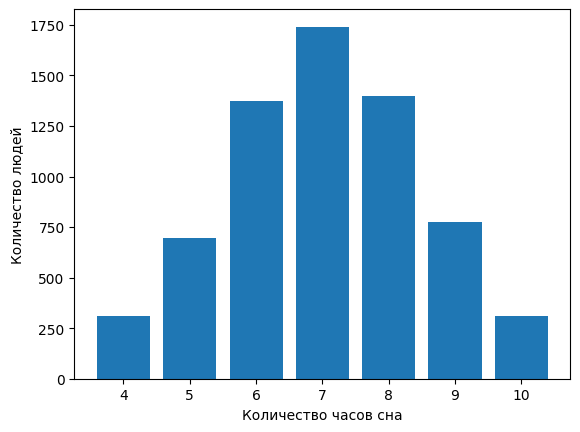

In [96]:
plt.bar(df['Sleep_Hours'].value_counts().index, df['Sleep_Hours'].value_counts().values)
plt.xlabel('Количество часов сна')
plt.ylabel('Количество людей')
plt.show()

#на графике видно, что количество часов затрачиваемых на сон распределено примерно нормально

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

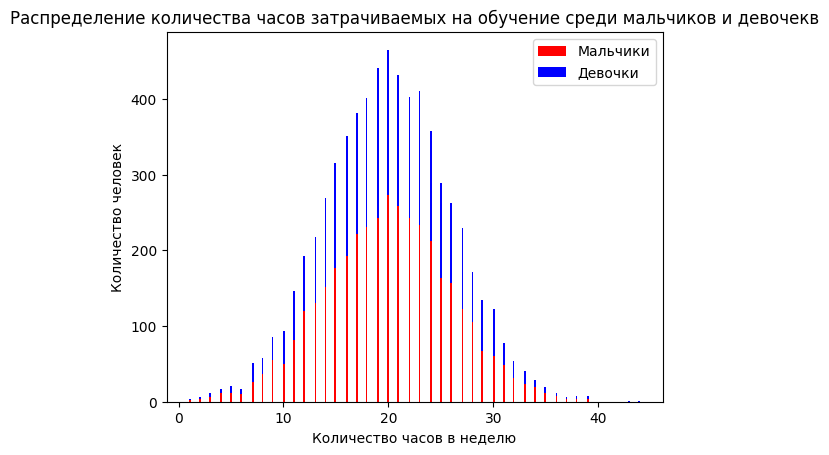

In [97]:
studied_hours_male = df['Hours_Studied'][df['Gender'] == 'Male']
studied_hours_female = df['Hours_Studied'][df['Gender'] == 'Female']
plt.hist([studied_hours_male, studied_hours_female],
         stacked = True,
         color = ['red', 'blue'], 
         histtype = 'bar',
         bins = max(studied_hours_male.value_counts().max(), studied_hours_female.value_counts().max()), 
         label = ['Мальчики', 'Девочки'])
plt.title('Распределение количества часов затрачиваемых на обучение среди мальчиков и девочекв')
plt.ylabel('Количество человек')
plt.xlabel('Количество часов в неделю')
plt.legend()
plt.show()

3. Как зависит результат конечного экзамена от результата первого экзамена

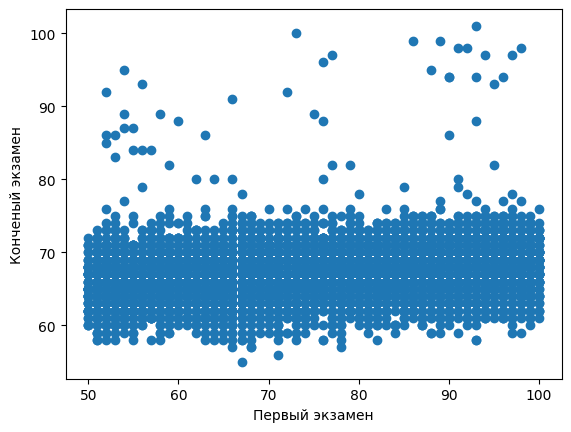

In [98]:
plt.scatter(df['Previous_Scores'], df['Exam_Score'])
plt.xlabel('Первый экзамен')
plt.ylabel('Конченый экзамен')
plt.show()
#На графике можно наблюдать слабую корреляцию результата конечного экзамена от результата первого экзамена --
# студенты, получившие высокие баллы за первый экзамен, получают баллы за конечный экзамен немного выше чем все остальные

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

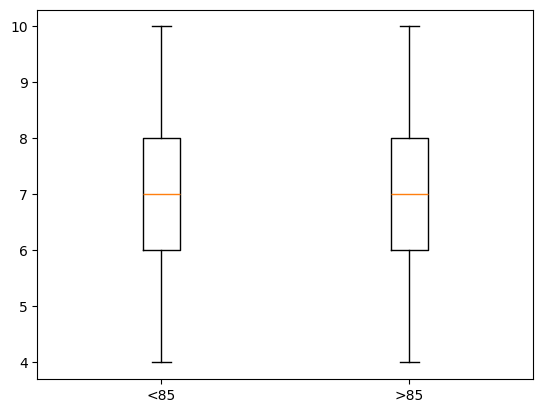

In [99]:
low_exam_score_sleep_hours = df[df['Exam_Score'] < 85]['Sleep_Hours']
high_exam_score_sleep_hours = df[df['Exam_Score'] > 85]['Sleep_Hours']

plt.boxplot([low_exam_score_sleep_hours, high_exam_score_sleep_hours], tick_labels = ['<85', '>85'])

plt.show()

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

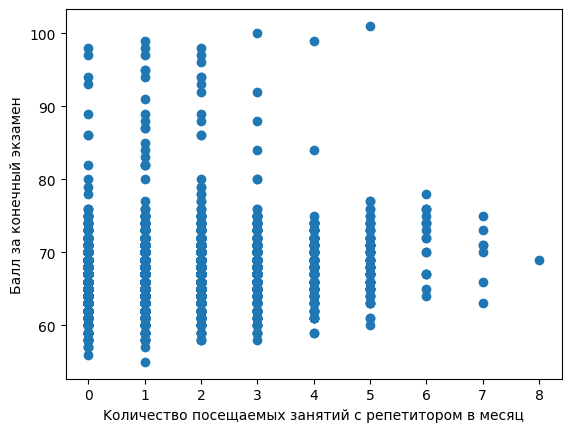

In [100]:
plt.scatter(df['Tutoring_Sessions'], df['Exam_Score'])
plt.xlabel('Kоличество посещаемых занятий с репетитором в месяц')
plt.ylabel('Балл за конечный экзамен')
plt.show()

#Из графика видим слабую корреляцию -- количество посещаемых занятий с репетитором в месяц не влияет на результат конечного экзамена

6. Как физическая активность влияет на успеваемость?

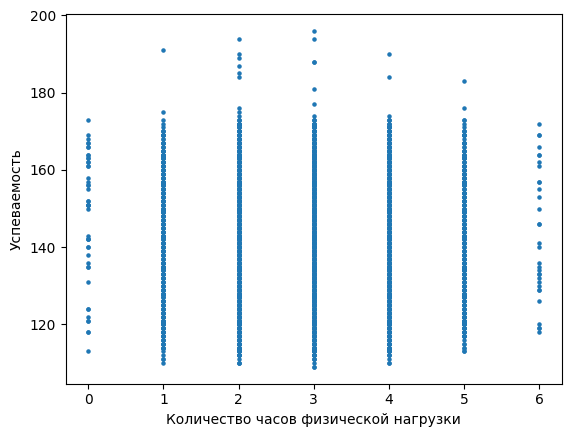

In [101]:
plt.scatter(df['Physical_Activity'], df['Exam_Score'] + df['Previous_Scores'], s = 5)
plt.xlabel('Количество часов физической нагрузки')
plt.ylabel('Успеваемость')
plt.show()

#Из графика видим слабую корреляцию -- физическая активность не влияет на успеваемость

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл